In [8]:
%load_ext autoreload
%autoreload 2

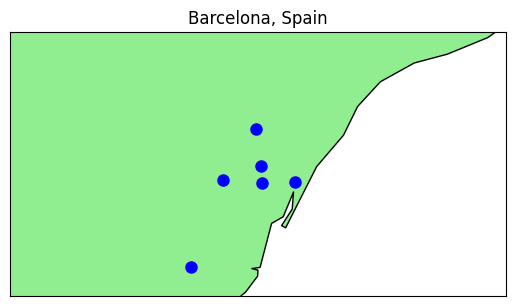

In [9]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

# Create Basemap instance
m = Basemap(
        projection='merc',
        llcrnrlon=1.9,  # Barcelona's longitude
        llcrnrlat=41.3, # Barcelona's latitude
        urcrnrlon=2.4,  # Barcelona's longitude
        urcrnrlat=41.5, # Barcelona's latitude
        lat_ts=0,
        resolution='h',
        suppress_ticks=True)

# Draw coastlines, countries, and states
m.drawcoastlines()
m.drawcountries()
m.drawstates()

# Fill continents with terrain color
m.fillcontinents(color='lightgreen', lake_color='aqua')

# Show Barcelona marker
x, y = m(2.1533988, 41.398724) # Barcelona's coordinates
m.plot(x, y, 'bo', markersize=8)
x, y = m(2.1480017, 41.42611) # Barcelona's coordinates
m.plot(x, y, 'bo', markersize=8)
x, y = m(2.1151996, 41.38749) # Barcelona's coordinates
m.plot(x, y, 'bo', markersize=8)
x, y = m(2.0821, 41.321774) # Barcelona's coordinates
m.plot(x, y, 'bo', markersize=8)
x, y = m(2.1873982, 41.386406) # Barcelona's coordinates
m.plot(x, y, 'bo', markersize=8)
x, y = m(2.1537998, 41.385315) # Barcelona's coordinates
m.plot(x, y, 'bo', markersize=8)

# Add title
plt.title('Barcelona, Spain')

# Show the plot
plt.show()


In [7]:
%matplotlib inline

import contextily as cx
import geopandas
import rasterio
from contextily import Place
from rasterio.plot import show as rioshow
from geodatasets import get_path
import matplotlib.pyplot as plt


data_url = "https://ndownloader.figshare.com/files/20232174"
db = geopandas.read_file(data_url)

In [8]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
df = pd.read_csv('Node-Location.csv',sep=';')
geometry = [Point(lon, lat) for lon, lat in zip(df['Lon'], df['Lat'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry, crs='EPSG:4326')
#gdf = gdf.drop(columns=['Lon', 'Lat'])

[[0.         0.59071078 0.52163846 0.         0.5763121  0.88376085
  0.         0.        ]
 [0.59071078 0.         0.23685644 0.         0.18588857 0.31469155
  0.         0.        ]
 [0.52163846 0.23685644 0.         0.         0.13314766 0.56025415
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.5763121  0.18588857 0.13314766 0.         0.         0.64577249
  0.         0.        ]
 [0.88376085 0.31469155 0.56025415 0.         0.64577249 0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.14368119]
 [0.         0.         0.         0.         0.         0.
  0.14368119 0.        ]]


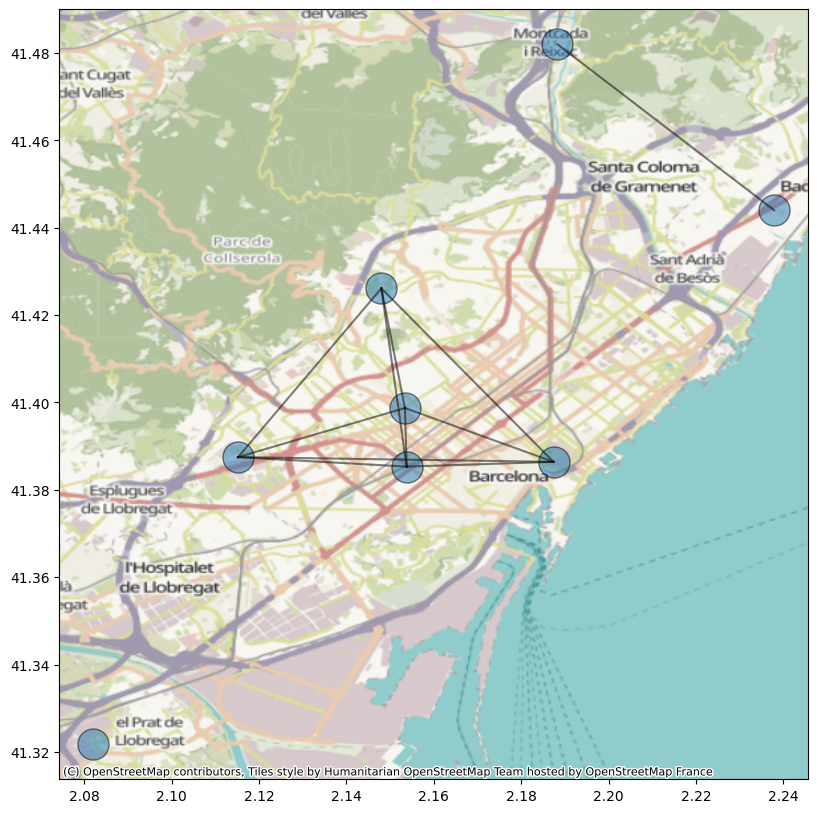

In [17]:
import contextily as ctx
from graph import draw_graph, Node, get_graph, get_edges_from_adjacency_matrix
from edge_discovery import euclidean_distance
from data import get_nodes

nodes, nodes_ids = get_nodes()
# Plot the GeoDataFrame
ax = gdf.plot(figsize=(10, 10), markersize=500, alpha=0.5, edgecolor='k')

# Add basemap from contextily
ctx.add_basemap(ax, crs=gdf.crs)

adj_matrix = euclidean_distance(nodes, threshold=7, std=3)
print(adj_matrix)
edges = get_edges_from_adjacency_matrix(adj_matrix)

# Plot edges between the nodes
for i, row in gdf.iterrows():
    x, y = row.geometry.x, row.geometry.y
    for j, row2 in gdf.iterrows():
        if (i,j) in edges:
            x2, y2 = row2.geometry.x, row2.geometry.y
            plt.plot([x, x2], [y, y2], 'k-', alpha=0.5)  # Plotting edges with black color and transparency

plt.show()


In [1]:
from graph import draw_graph_in_map


In [15]:
from graph import draw_graph_in_map
import pandas as pd
import geopandas as gpd
from graph import draw_graph, Node, get_graph, get_edges_from_adjacency_matrix
from edge_discovery import euclidean_distance
from data import get_nodes
from shapely.geometry import Point
df = pd.read_csv('Node-Location.csv',sep=';')
geometry = [Point(lon, lat) for lon, lat in zip(df['Lon'], df['Lat'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry, crs='EPSG:4326')
nodes, nodes_ids = get_nodes()

[[0.         0.82736084 0.79113948 0.         0.8200433  0.95649018
  0.22326081 0.15214543]
 [0.82736084 0.         0.595408   0.         0.54567112 0.65953618
  0.30051736 0.3689222 ]
 [0.79113948 0.595408   0.         0.29505885 0.48390496 0.81174315
  0.         0.        ]
 [0.         0.         0.29505885 0.         0.         0.18001265
  0.         0.        ]
 [0.8200433  0.54567112 0.48390496 0.         0.         0.85433586
  0.3089676  0.        ]
 [0.95649018 0.65953618 0.81174315 0.18001265 0.85433586 0.
  0.15963943 0.        ]
 [0.22326081 0.30051736 0.         0.         0.3089676  0.15963943
  0.         0.49735212]
 [0.15214543 0.3689222  0.         0.         0.         0.
  0.49735212 0.        ]]
Number of edges: 19
Mean of all non-zero weights: 0.5174478697195396
Average of all non-zero weights: 0.5174478697195396
Mean of all weights (including zero weights): 0.3072346726459767
Average of all weights (including zero weights): 0.3072346726459767


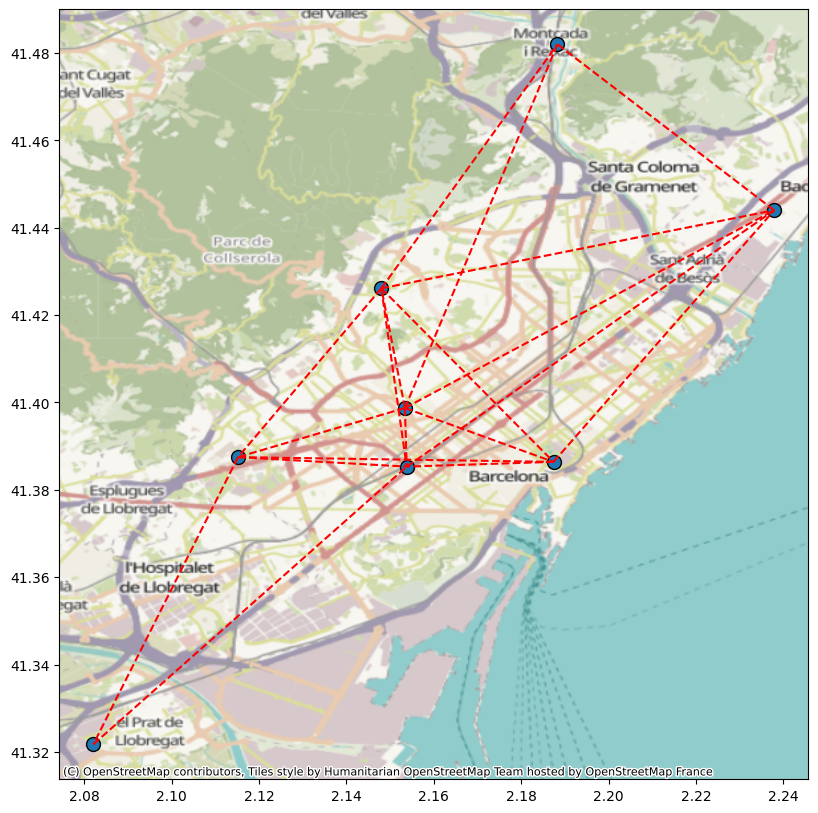

In [34]:
import numpy as np
threshold = 10
std = 5

adj_matrix = euclidean_distance(nodes, threshold=threshold, std=std)
print(adj_matrix)
edges = get_edges_from_adjacency_matrix(adj_matrix)

# Number of edges calculation
num_edges = np.sum(adj_matrix > 0) // 2  # Since it's an undirected graph, divide by 2
print("Number of edges:", num_edges)

# Flatten the adjacency matrix to get all weights
all_weights = adj_matrix.flatten()

# Calculate mean and average for all non-zero weights
non_zero_weights = all_weights[all_weights != 0]
mean_non_zero = np.mean(non_zero_weights)
avg_non_zero = np.average(non_zero_weights)

# Calculate mean and average for all weights (including zero weights)
mean_all = np.mean(all_weights)
avg_all = np.average(all_weights)

print("Mean of all non-zero weights:", mean_non_zero)
print("Average of all non-zero weights:", avg_non_zero)
print("Mean of all weights (including zero weights):", mean_all)
print("Average of all weights (including zero weights):", avg_all)


draw_graph_in_map(gdf, edges, f'distance_{threshold}_{std}')

In [ ]:
# tres plots:
# #edge vs std for three threshold (2,5,10)
# avg por lo mismo
# median